In [69]:
all_data = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
location = pd.read_csv("nysub.csv")
df_sub = pickle.load( open( "df_sub.p", "rb" ) )
sub_lat=[]
sub_lon=[]
sub_name=[]
for i in range(len(location)):
    sub_name.append(location['NAME'][i])
    sub_lat.append(float(location["the_geom"][i][7:-1].split()[1]))
    sub_lon.append(float(location["the_geom"][i][7:-1].split()[0]))

In [115]:
location['lat'] = sub_lat
location['lon'] = sub_lon

In [151]:
def plot_prep(name):
    df_plot = df_sub.sort_values(by=name,ascending=0)
    heat_key = dict(df_plot['F_ratio'])
    location_temp = location
    location_temp["heat"] = location_temp["NAME"]
    location_temp = location_temp.replace({"heat":heat_key})
    location_temp = location_temp[['NAME','lat','lon','heat']]
    location_temp = location_temp.sort_values(by='heat',ascending=0)
    location_temp.index = range(len(location_temp))
    return location_temp

In [180]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline
import seaborn as sns

def plot(location_temp):
    plt.figure(figsize=(20,20))
    for i, txt in enumerate(location_temp['NAME']):
        plt.plot(location_temp['lon'][i],location_temp['lat'][i],marker=".", markersize=location_temp['heat'][i]*7, color="yellow")
        if i<20:
            plt.annotate(txt,(location_temp['lon'][i],location_temp['lat'][i]),color='red',size='x-large',weight='bold')
        if i>453:
            plt.annotate(txt,(location_temp['lon'][i],location_temp['lat'][i]),color='lime',size='medium',weight='bold')

    plt.scatter(all_data['Longitude'],all_data['Latitude'],s=0.6)
    plt.title('Crime Complaint Map')
    
    red_patch = mpatches.Patch(color='red', label='Dangerous Zone')
    green_patch = mpatches.Patch(color='lime', label='Safe Zone')
    plt.legend(handles=[red_patch,green_patch])
    
    plt.show()

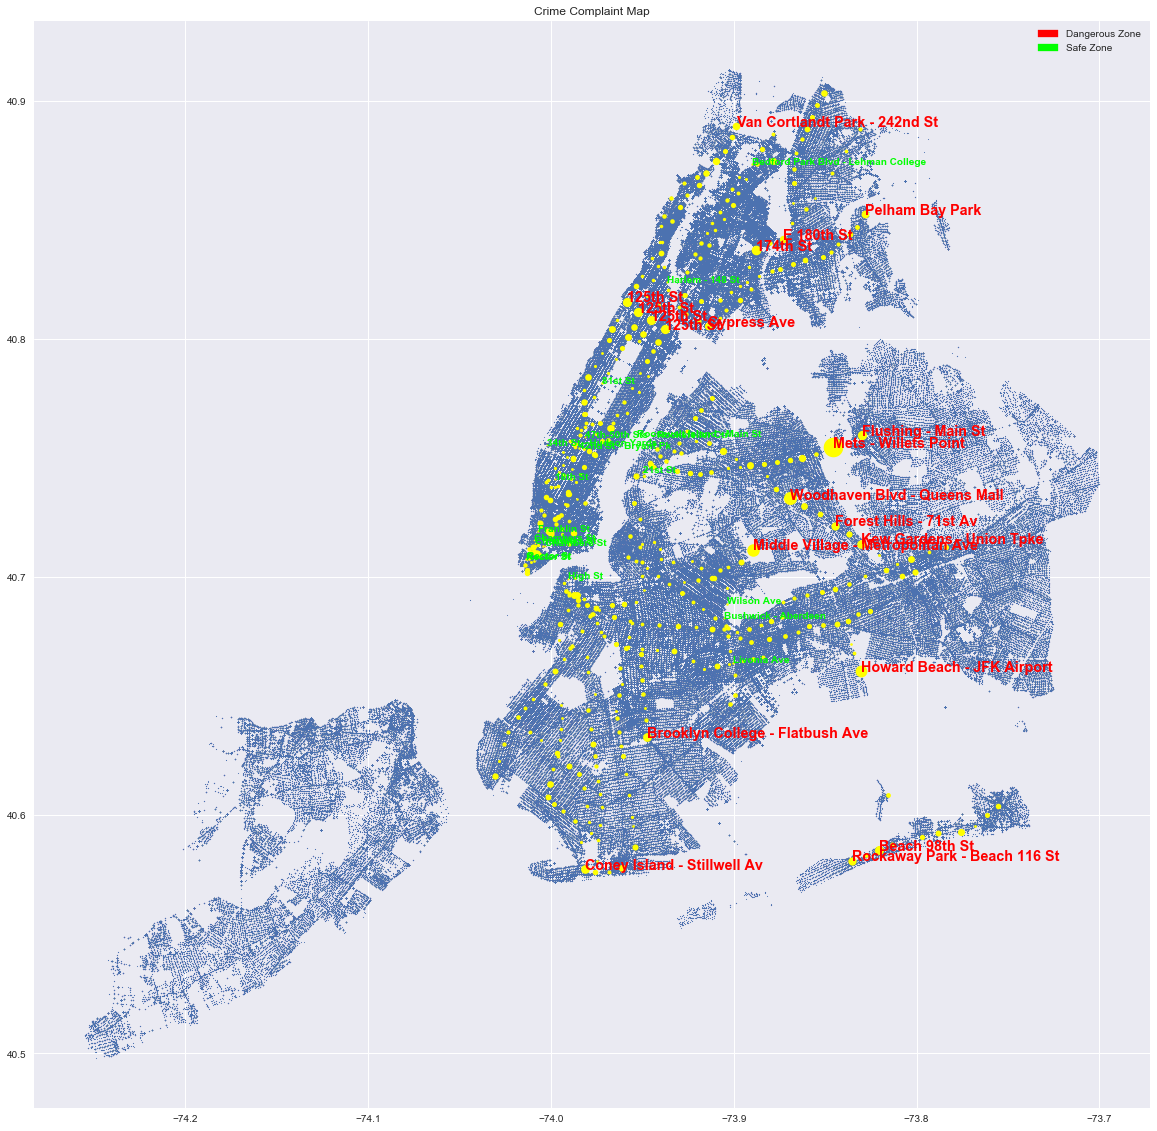

In [181]:
location_temp = plot_prep("Mean_R")
plot(location_temp)

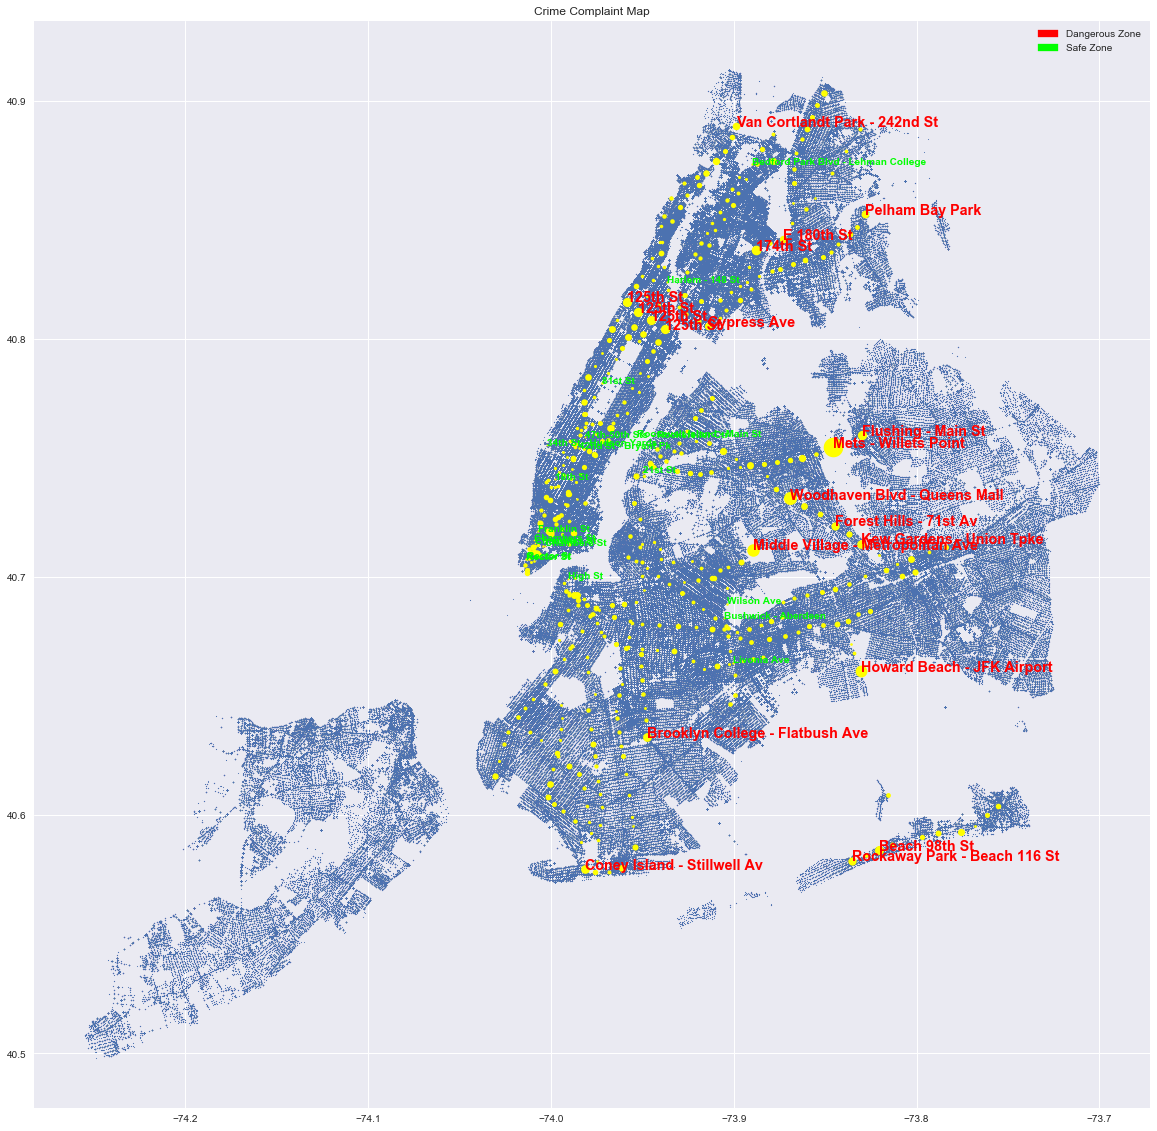

In [182]:
location_temp = plot_prep("F_ratio")
plot(location_temp)

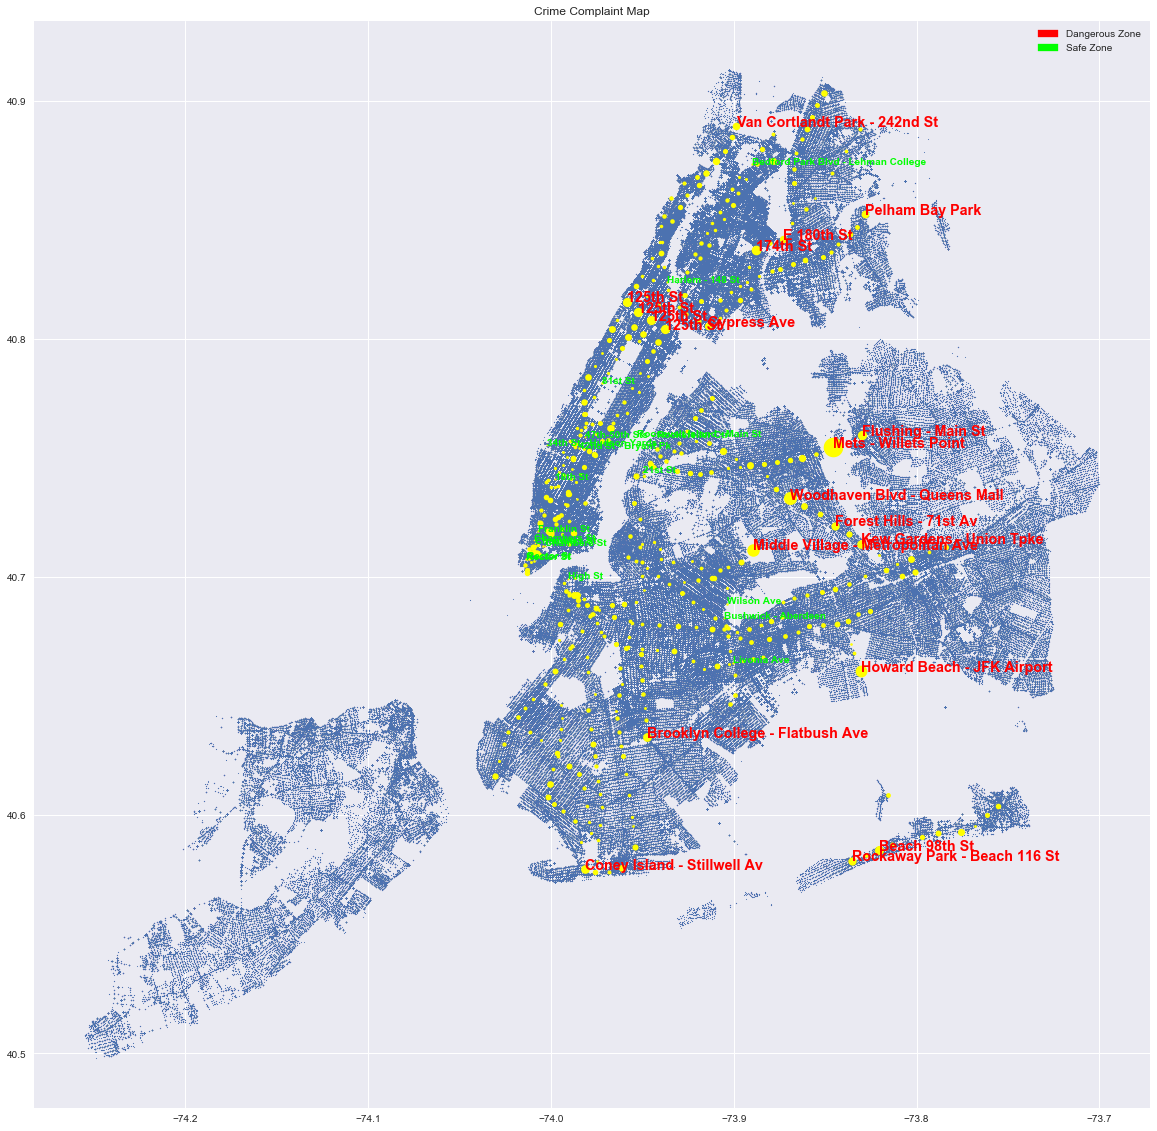

In [183]:
location_temp = plot_prep("M_ratio")
plot(location_temp)

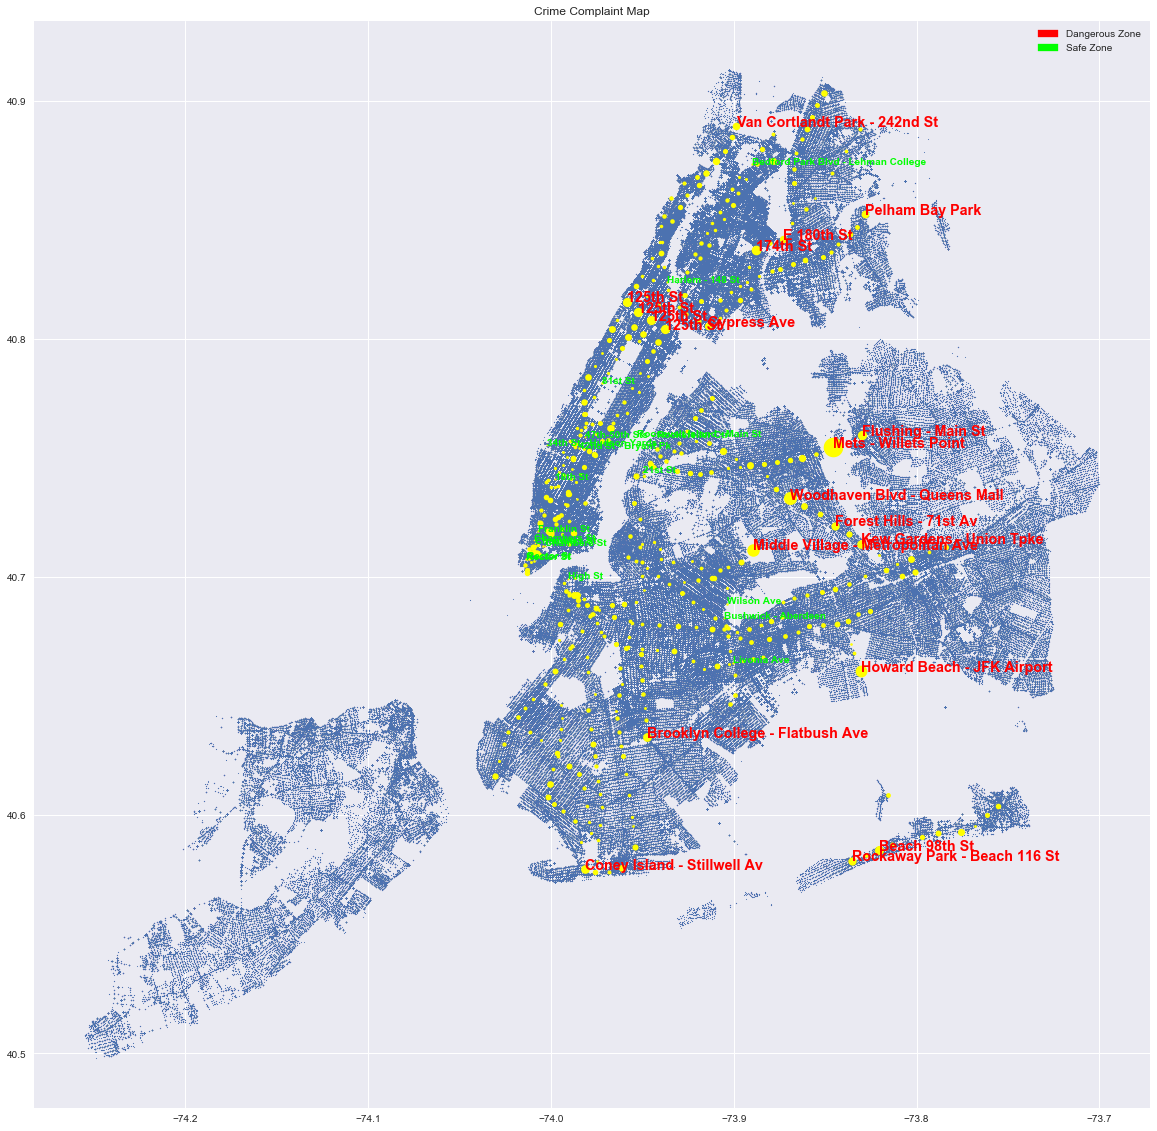

In [184]:
location_temp = plot_prep("V_ratio")
plot(location_temp)